# PyMC3 Demo

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [9]:
az.style.use('arviz-darkgrid')

In [10]:
np.random.seed(10)
trials = 10
theta_real = 0.25
data = stats.bernoulli.rvs(p=theta_real, size=trials)
data

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [11]:
with pm.Model() as model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    θhat = pm.sample(1000, random_seed=10, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


array([[<AxesSubplot:title={'center':'θ'}>,
        <AxesSubplot:title={'center':'θ'}>]], dtype=object)

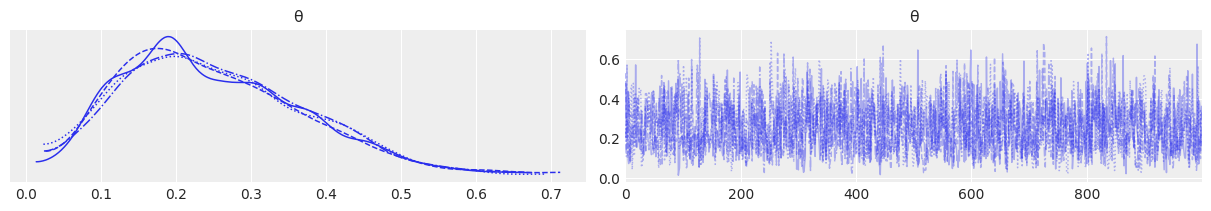

In [12]:
az.plot_trace(θhat)

<AxesSubplot:title={'center':'θ'}>

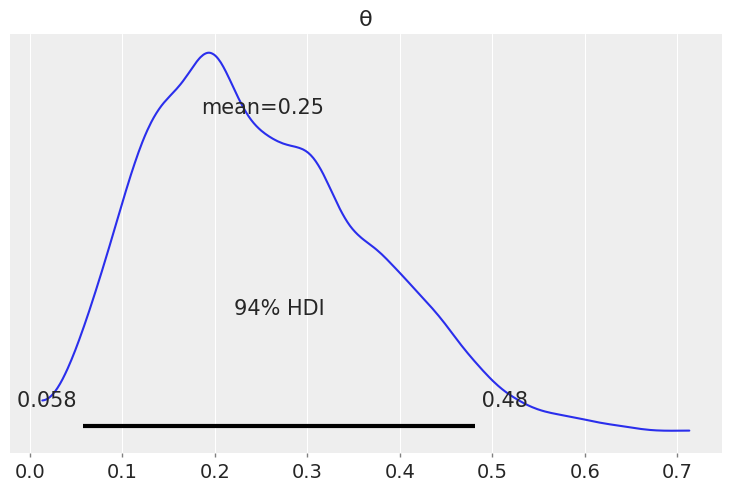

In [70]:
az.plot_posterior(θhat)

# Analytical Solution

In [52]:
import numpy as np
import scipy.stats
import random
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [53]:
def coin_flip(p,N):
    flip_result = bernoulli.rvs(p, size=N)
    head = flip_result.sum()
    return head,N-head

In [63]:
def plot_posterior_beta(alpha, beta):
    r=np.arange(0.,1.01,.01)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(f"Posterior Beta Distribution({alpha},{beta})")
    ax.plot(r, scipy.stats.beta.pdf(r, alpha, beta), 'r-')
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("posterior probability density")  
    plt.show()

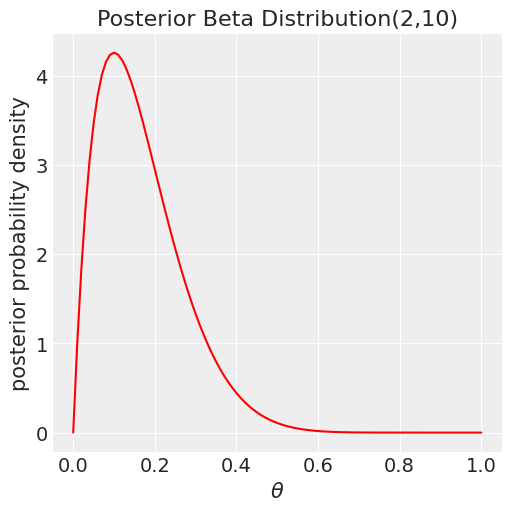

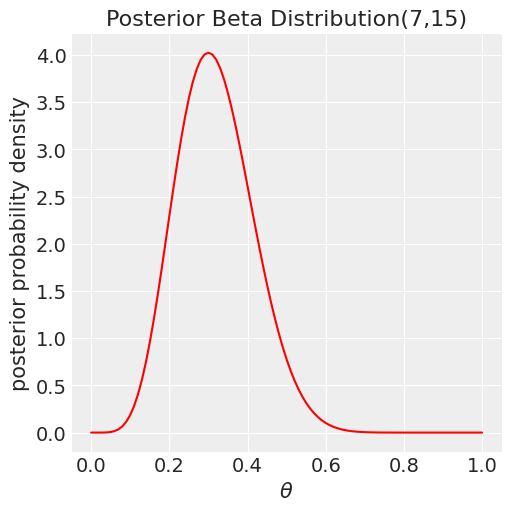

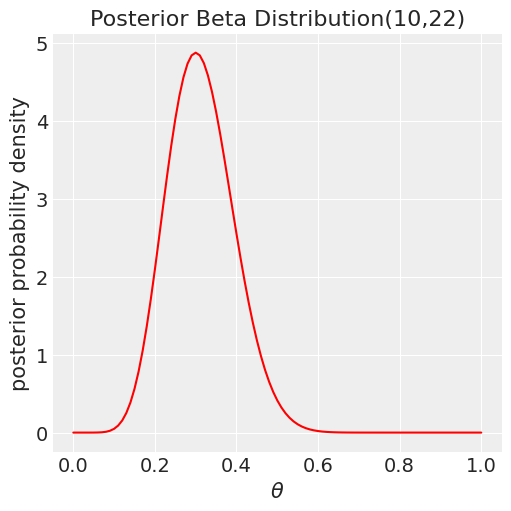

In [69]:
p=0.25
N = 10
alpha,beta = 1,1
for i in range(3):
    head,tail  = coin_flip(p, N)
    alpha,beta = alpha+head,beta+tail
    plot_posterior_beta(alpha, beta)
    